<a href="https://colab.research.google.com/github/galihwangiputri/Telecom_EDA/blob/main/Telcom_Portofolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom User Data Analysis


About this file

* customerID - customer id
* gender - client gender (male / female)
* SeniorCitizen - is the client retired (1, 0)
* Partner - is the client married (Yes, No)
* tenure - how many months a person has been a client of the company
* PhoneService - is the telephone service connected (Yes, No)
* MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
* InternetService - client's Internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - is the online security service connected (Yes, No, No internet service)
* OnlineBackup - is the online backup service activated (Yes, No, No internet service)
* DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
* TechSupport - is the technical support service connected (Yes, No, No internet service)
* StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
* StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
* Contract - type of customer contract (Month-to-month, One year, Two year)
* PaperlessBilling - whether the client uses paperless billing (Yes, No)
* PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - current monthly payment
* TotalCharges - the total amount that the client paid for the services for the entire time
* Churn - whether there was a churn (Yes or No)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import seaborn as sns

In [ ]:
# Preview Dataset
df_telcom = pd.read_csv('/content/telecom_users.csv')

df_telcom.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
# Get Data Type and Non-Null Value for each column
df_telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [ ]:
# Check Missing Value
print(df_telcom.isna().sum())

print("\n")

# Count per Data Type
print(df_telcom.dtypes.value_counts())

print("\n")

# Check Variable Type Categorical
print(df_telcom.select_dtypes(exclude=['int64', 'float64']).columns)

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


object     18
int64       3
float64     1
dtype: int64


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


## Data Cleaning

In [ ]:
# TotalCharges Column: Change value " " to "0"
df_telcom['TotalCharges'][df_telcom['TotalCharges'] == " "] = 0

# Check if TotalCharges Columns has changed
df_telcom['TotalCharges'][df_telcom['TotalCharges'] == " "]

df_telcom['TotalCharges'] = pd.to_numeric(df_telcom['TotalCharges'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [ ]:
df_telcom['customerID'].duplicated().value_counts()

False    5986
Name: customerID, dtype: int64

In [ ]:
df_partner_streamTV = df_telcom.groupby('Partner')['MonthlyCharges'].sum()

df_partner_streamTV

Partner
No     190350.95
Yes    197555.10
Name: MonthlyCharges, dtype: float64

In [ ]:
df_stream = df_telcom[df_telcom['StreamingTV'] == 'Yes']

df_stream_not = df_telcom[df_telcom['StreamingTV'] != 'Yes']

print(df_stream.shape[0])
print(df_stream_not.shape[0])

2306
3680
5986


In [ ]:
df_telcom.groupby(['StreamingTV'])['customerID'].count()

StreamingTV
No                     2389
No internet service    1291
Yes                    2306
Name: customerID, dtype: int64

In [ ]:
df_telcom.groupby(['StreamingMovies'])['customerID'].count()

StreamingMovies
No                     2356
No internet service    1291
Yes                    2339
Name: customerID, dtype: int64

In [ ]:
df_telcom['StreamingTV'].unique()

array(['No internet service', 'Yes', 'No'], dtype=object)

In [ ]:
v = pd.pivot_table(df_telcom,
                   values='customerID',
                   index='Partner',
                   columns='StreamingTV',
                   aggfunc='count')
v

StreamingTV,No,No internet service,Yes
Partner,,,
No,1422,662,998
Yes,967,629,1308


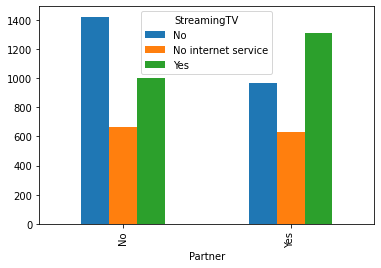

In [ ]:
v.plot(kind='bar')

In [ ]:
l = pd.pivot_table(df_telcom,
               index=['StreamingTV', 'StreamingMovies'],
               columns ='Partner',
               values='customerID',
               aggfunc='count')
l

Partner                                    No  Yes
StreamingTV         StreamingMovies               
No                  No                   1076  634
                    Yes                   346  333
No internet service No internet service   662  629
Yes                 No                    316  330
                    Yes                   682  978

In [ ]:
m = l.reset_index()
m

,gender,StreamingMovies,StreamingTV
0,Female,2936,2936
1,Male,3050,3050


In [ ]:
v1 = pd.pivot_table(df_telcom,
               index=['StreamingMovies'],
               columns ='gender',
               values='customerID',
               aggfunc='count')
v1

gender,Female,Male
StreamingMovies,,
No,1149,1207
No internet service,627,664
Yes,1160,1179


In [ ]:
v2 = pd.pivot_table(df_telcom,
               index=['StreamingTV'],
               columns ='gender',
               values='customerID',
               aggfunc='count')
v2

gender,Female,Male
StreamingTV,,
No,1164,1225
No internet service,627,664
Yes,1145,1161


In [ ]:
v1 = pd.pivot_table(df_telcom,
               index=['SeniorCitizen'],
               columns ='PhoneService',
               values='customerID',
               aggfunc='count')
v1

PhoneService,No,Yes
SeniorCitizen,,
0,501,4519
1,89,877


In [ ]:
v1 = pd.pivot_table(df_telcom,
               index=['SeniorCitizen'],
               columns ='PaymentMethod',
               values='customerID',
               aggfunc='count')
v1

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
SeniorCitizen,,,,
0,1109,1119,1505,1287
1,199,184,501,82


In [ ]:
v1 = pd.pivot_table(df_telcom,
               index = 'Partner',
               columns = ['Dependents'],
               values='TotalCharges',
               aggfunc='sum')
v1

Dependents,No,Yes
Partner,,
No,4451008.55,433645.95
Yes,4782494.00,4066061.75


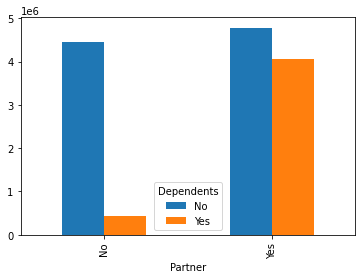

In [ ]:
v1.plot(kind='bar')

In [ ]:
# import pandas as pd 
df = pd.read_excel('https://github.com/datagy/pivot_table_pandas/raw/master/sample_pivot.xlsx', parse_dates=['Date']) 
print(df.head())

        Date Region                 Type  Units  Sales
0 2020-07-11   East  Children's Clothing   18.0    306
1 2020-09-23  North  Children's Clothing   14.0    448
2 2020-04-02  South     Women's Clothing   17.0    425
3 2020-02-28   East  Children's Clothing   26.0    832
4 2020-03-19   West     Women's Clothing    3.0     33


In [ ]:
sales_by_region = pd.pivot_table(df, index = 'Region', values = 'Sales', aggfunc='mean') 
print(sales_by_region)

             Sales
Region            
East    408.182482
North   438.924051
South   432.956204
West    452.029412


In [ ]:
columns_example = pd.pivot_table(df, index = 'Type', columns = 'Region', values = 'Units', aggfunc = 'sum') 
print(columns_example)

Region                 East   North   South    West
Type                                               
Children's Clothing  2318.0  1763.0  1017.0   789.0
Men's Clothing       2420.0     0.0   725.0   829.0
Women's Clothing     3372.0  2596.0  1056.0  1006.0
